# Project of Group 20- Evolutionary strategies in Prisoner's Dilemma: an exploration using multi-agent simulation
We aim to explore a simulation of agents interacting by playing a simple game, with the rules according to the prisoner's dilemma. We will try to expand the rules of the game and also add different qualities to the agents themselves such as memory and ability to exchange information with each other. We will also attempt to allow for evolving strategies.<br>
The goal is to examine the possible, stable strategies that emerge and how prevelant those strategies are in various settings.<br>

## Agent strategy

### Basic strategies
- Cooperator: A player who only ever cooperates.<br>
- Defector: A player who only ever defects.<br>
- TipForTat: A player starts by cooperating and then mimics the previous action of the opponent ([Axelrod1980](http://axelrod.readthedocs.io/en/stable/reference/bibliography.html#axelrod1980)).

### Advanced strategies
- Adaptive: A player who starts with a specific sequence of cooperate (C) and defect (D), then play the strategy that has worked best, recalculated each turn ([Li2011](http://axelrod.readthedocs.io/en/stable/reference/bibliography.html#li2011)).<br>
- ANN: Artificial Neural Network based strategy ([Original Source](https://gist.github.com/mojones/550b32c46a8169bb3cd89d917b73111a#file-ann-strategy-test-L60)).<br>
- EvolvedANN: A strategy based on a pre-trained neural network with 17 features and a hidden layer of size 10 (Evolved ANN: Original name by Martin Jones, see above).<br>

More can be found in [Axelrod-Reference-Strategies index](http://axelrod.readthedocs.io/en/stable/reference/all_strategies.html).

## Noisy tournaments (the probability of making mistake is not zero)
A common variation on iterated prisoner’s dilemma tournaments is to add stochasticity in the choice of actions, simply called noise. This noise is introduced by flipping plays between C and D with some probability that is applied to all plays after they are delivered by the player ([Bendor1993](http://axelrod.readthedocs.io/en/stable/reference/bibliography.html#bendor1993)).<br><br>
(Source: [Noisy tournaments](http://axelrod.readthedocs.io/en/stable/tutorials/further_topics/noisy_tournaments.html#noisy-tournaments))

## [Moran process](https://en.wikipedia.org/wiki/Moran_process) (the natural selection process)
The process works as follows. Given an initial population of players, the population is iterated in rounds consisting of:<br>

- matches played between each pair of players, with the cumulative total scores recorded
- a player is chosen to reproduce proportional to the player’s score in the round
- a player is chosen at random to be replaced

## A preliminary exploration using [Axelrod package](http://axelrod.readthedocs.io/en/stable/index.html)
The package is the python package named after the author of book "The Complexity of Cooperation."

### 1. An iterated population-wise tournament considering noise and natural selection

In [10]:
# Load required packages
import axelrod as axl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#To make it pretty
matplotlib.style.use('seaborn-colorblind')
font = {'size' : 14}
matplotlib.rc('font', **font)

In [16]:
# Initialization of players and noise
noise = 0.1
population_size = 20
number_Defector = 6
number_Cooperator = 6
number_TitForTat = 6
number_Adaptive = population_size - number_Defector - number_Cooperator - number_TitForTat
players = [axl.Defector()]*number_Defector + [axl.Cooperator()]*number_Cooperator + [axl.TitForTat()]*number_TitForTat + [axl.Adaptive()]*number_Adaptive

Winning population: Tit For Tat


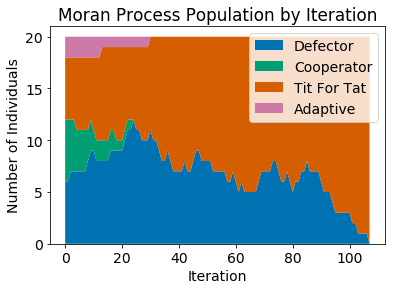

In [17]:
# 1- A simulation
axl.seed(15) # for reproducible example
mp = axl.MoranProcess(players=players, turns=200, noise=noise)
populations = mp.play()
print('Winning population: '+mp.winning_strategy_name)
ax = mp.populations_plot()
plt.show()

### 2. Exploring the impact of noise on the winning strategy

In [6]:
# Initialization of players
population_size = 10
number_Defector = 3
number_Cooperator = 3
number_TitForTat = 3
number_Adaptive = population_size - number_Defector - number_Cooperator - number_TitForTat
players = [axl.Defector()]*number_Defector + [axl.Cooperator()]*number_Cooperator + [axl.TitForTat()]*number_TitForTat + [axl.Adaptive()]*number_Adaptive

In [15]:
# Winning strategy as a function of noise
winner_record = dict()
for noise in np.arange(0,1.1,0.1):
    axl.seed(15) # for reproducible example
    mp = axl.MoranProcess(players=players, turns=200, noise=noise)
    populations = mp.play()
    winner_record[noise]=mp.winning_strategy_name
winner_record = pd.DataFrame([winner_record]).transpose()
winner_record.index.names = ['Noise']
winner_record.columns = ['Strategy']
print(winner_record)

         Strategy
Noise            
0.0      Adaptive
0.1      Defector
0.2      Defector
0.3      Defector
0.4      Defector
0.5      Defector
0.6      Defector
0.7    Cooperator
0.8    Cooperator
0.9    Cooperator
1.0    Cooperator
